# PRACTICA DATA WRANGLING

Alumno: Rodrigo Robert -
Curso: Data Science -
Comisión: 29720

Consigna: Leer los set de datos w_data.csv y p_data.csv, fusionarlos a partir de la variable que tengan en común (ID)y realizar las siguientes ejercicios:



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
w_data = pd.read_csv('/content/drive/Othercomputers/Mi portátil/02. Programacion/Coder - Data science/Clase 28 - Data Wrangling II/w_data.csv', sep=';')

In [ ]:
p_data = pd.read_csv('/content/drive/Othercomputers/Mi portátil/02. Programacion/Coder - Data science/Clase 28 - Data Wrangling II/p_data.csv', sep=';')

Minima previsualizaició de datos

In [ ]:
print(w_data.shape)
print(p_data.shape)

#Aquí se puede ver que hay 1 fila de diferencia

(48843, 7)
(48842, 9)


In [ ]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Workclass       48842 non-null  object 
 1   fnlwgt          48842 non-null  float64
 2   Capital Gain    48842 non-null  float64
 3   Capital Loss    48842 non-null  float64
 4   Hours per week  48842 non-null  float64
 5   ID              48843 non-null  int64  
 6   Target          48842 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48841 non-null  float64
 1   Sex             48841 non-null  object 
 2   ID              48842 non-null  int64  
 3   Race            48841 non-null  object 
 4   Country         48841 non-null  object 
 5   Education       48841 non-null  object 
 6   Education-Num   48841 non-null  float64
 7   Marital Status  48841 non-null  object 
 8   Relationship    48841 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [ ]:
w_data.head(5)

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


In [ ]:
p_data.head(5)

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [ ]:
#Efectumos el merge

df = pd.merge(p_data, w_data, on = 'ID')

In [ ]:
# Verificamos el df resultante

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48841 non-null  float64
 1   Sex             48841 non-null  object 
 2   ID              48842 non-null  int64  
 3   Race            48841 non-null  object 
 4   Country         48841 non-null  object 
 5   Education       48841 non-null  object 
 6   Education-Num   48841 non-null  float64
 7   Marital Status  48841 non-null  object 
 8   Relationship    48841 non-null  object 
 9   Workclass       48841 non-null  object 
 10  fnlwgt          48841 non-null  float64
 11  Capital Gain    48841 non-null  float64
 12  Capital Loss    48841 non-null  float64
 13  Hours per week  48841 non-null  float64
 14  Target          48841 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 6.0+ MB


In [ ]:
# Verificamos si hay IDs duplicados

df['ID'].duplicated().sum()

0

In [ ]:
# Ordenamos el data ser para visualizar la "fila" de diferencia que encontramos

df.sort_values('Capital Gain')

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
24420,43.0,Male,842366385,Black,United-States,10th,6.0,Never-married,Not-in-family,Private,129853.0,0.0,0.0,40.0,<=50K
30001,27.0,Male,545444932,Black,United-States,HS-grad,9.0,Never-married,Own-child,Private,297457.0,0.0,0.0,40.0,<=50K
30002,18.0,Female,551999835,White,United-States,11th,7.0,Never-married,Own-child,Private,279593.0,0.0,0.0,2.0,<=50K
30003,20.0,Female,226207021,White,United-States,Some-college,10.0,Never-married,Own-child,Private,211968.0,0.0,0.0,15.0,<=50K
30004,18.0,Male,814743695,White,United-States,Some-college,10.0,Never-married,Own-child,Private,194561.0,0.0,0.0,12.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,28.0,Male,640238435,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,Private,106141.0,99999.0,0.0,40.0,>50K.
42976,31.0,Female,176456296,White,United-States,Masters,14.0,Never-married,Not-in-family,Private,203463.0,99999.0,0.0,40.0,>50K.
16740,41.0,Male,1009945019,White,United-States,Doctorate,16.0,Married-civ-spouse,Husband,Self-emp-inc,495061.0,99999.0,0.0,70.0,>50K
19133,69.0,Male,1413252087,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,?,323016.0,99999.0,0.0,40.0,>50K


In [ ]:
# Eliminamos esa única fila

df.dropna(inplace=True)

1. Cuantos ID tienen en común. Nombrar cuales no tienen en común.

In [ ]:
df.shape

(48841, 15)

In [ ]:
# 48841 filas en común
# No tenía en común la fila 32561

2. Corregir los target a solo dos valores distintos ‘<=50k’ y ‘>50k’


In [ ]:
df["Target"].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3845
Name: Target, dtype: int64

In [ ]:
df["Target"] = df["Target"].replace(' <=50K.', ' <=50K')

In [ ]:
df["Target"] = df["Target"].replace(' >50K.', ' >50K')

In [ ]:
values = df["Target"].value_counts()

In [ ]:
print(values)

 <=50K    37155
 >50K     11686
Name: Target, dtype: int64


3. Calcular la proporción que hay entre personas con salarios >50k respecto del total para Entre personas de distinto sexo, Raza y Educacion. Por ejemplo cuál es el porcentaje de mujeres con un salario mayor a 50K y compararlo con el de los hombres. Lo mismo para personas de distintas razas y Educación

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

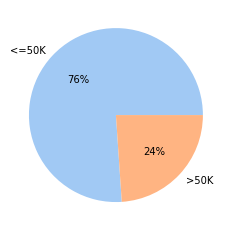

In [ ]:
# Proporción total es

labels = ['<=50K', '>50K']
colors = sns.color_palette('pastel')[0:5]

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
# Prporciones según sexo

sex = df['Sex'].groupby(df['Target']).value_counts()

In [ ]:
sex

Target  Sex    
 <=50K   Male      22732
         Female    14423
 >50K    Male       9917
         Female     1769
Name: Sex, dtype: int64

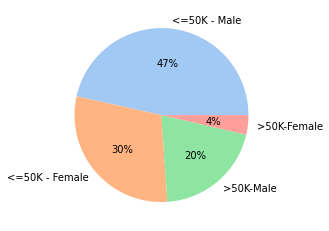

In [ ]:
labels = ['<=50K - Male', '<=50K - Female', '>50K-Male', '>50K-Female'] 
colors = sns.color_palette('pastel')[0:5]

plt.pie(sex, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
# Prporciones según raza

race = df['Race'].groupby(df['Target']).value_counts()

In [ ]:
race

Target  Race               
 <=50K   White                 31155
         Black                  4119
         Asian-Pac-Islander     1110
         Amer-Indian-Eskimo      415
         Other                   356
 >50K    White                 10606
         Black                   566
         Asian-Pac-Islander      409
         Amer-Indian-Eskimo       55
         Other                    50
Name: Race, dtype: int64

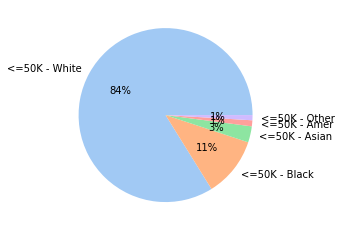

In [ ]:
# Proporcion para menor o igual a 50K
labels = ['<=50K - White', '<=50K - Black', '<=50K - Asian', '<=50K - Amer', '<=50K - Other'] 
colors = sns.color_palette('pastel')[0:5]

plt.pie(race[0:5], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

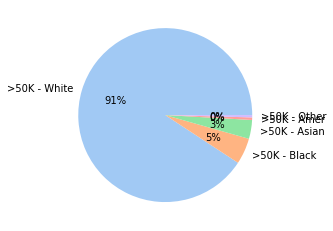

In [77]:
# Proporcion para mayor a 50K
labels = ['>50K - White', '>50K - Black', '>50K - Asian', '>50K - Amer', '>50K - Other'] 
colors = sns.color_palette('pastel')[0:5]

plt.pie(race[5:], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
# Prporciones según educación, sin gráfico porque se vería mal las etiquitas

edu = df['Education'].groupby(df['Target']).value_counts()

In [ ]:
edu

Target  Education    
 <=50K   HS-grad         13281
         Some-college     8815
         Bachelors        4712
         11th             1720
         Assoc-voc        1539
         10th             1302
         Masters          1198
         Assoc-acdm       1188
         7th-8th           893
         9th               715
         12th              609
         5th-6th           482
         1st-4th           239
         Prof-school       217
         Doctorate         163
         Preschool          82
 >50K    Bachelors        3312
         HS-grad          2503
         Some-college     2063
         Masters          1459
         Prof-school       617
         Assoc-voc         522
         Doctorate         431
         Assoc-acdm        413
         11th               92
         10th               87
         7th-8th            62
         12th               48
         9th                41
         5th-6th            27
         1st-4th             8
         Preschoo